K: 1, Mean of Accuracy:   42.352941176470594
K: 2, Mean of Accuracy:   38.03921568627451
K: 3, Mean of Accuracy:   40.7843137254902
K: 4, Mean of Accuracy:   42.35294117647059
K: 5, Mean of Accuracy:   42.74509803921569
K: 6, Mean of Accuracy:   39.6078431372549
K: 7, Mean of Accuracy:   45.09803921568628
K: 8, Mean of Accuracy:   40.3921568627451
K: 9, Mean of Accuracy:   39.6078431372549
K: 10, Mean of Accuracy:   38.431372549019606
K: 11, Mean of Accuracy:   43.13725490196079
K: 12, Mean of Accuracy:   41.96078431372548
K: 13, Mean of Accuracy:   38.03921568627451
K: 14, Mean of Accuracy:   40.7843137254902
K: 15, Mean of Accuracy:   40.3921568627451
K: 16, Mean of Accuracy:   42.74509803921569
K: 17, Mean of Accuracy:   39.21568627450981
K: 18, Mean of Accuracy:   46.27450980392157
K: 19, Mean of Accuracy:   43.92156862745098
K: 20, Mean of Accuracy:   32.156862745098046


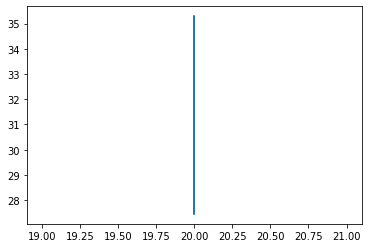

In [61]:
# Example of kNN implemented from Scratch in Python

import pandas as pd
import random
import math
import operator
import numpy as np
import matplotlib.pyplot as plt

def loadDataset(filename, split):
	trainingSet=[]
	testSet=[]
	df = pd.read_csv(url, header=None)
	array = df.to_numpy()
	random.shuffle(array)
	training_len = int(len(array)*split)
	trainingSet = array[:training_len]
	testSet = array[training_len:]
	return trainingSet, testSet


def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0
	
def main():
	# prepare data
	trainingSet=[]
	testSet=[]
	split = 0.67
	url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'

	for k in range(1,21):

		accuracyTotal=[]
		kArr=[]

		for i in range(5):
    
			trainingSet, testSet = loadDataset(url, 0.66)
			#print('Train set: ' + repr(len(trainingSet)))
			#print('Test set: ' + repr(len(testSet)))
			# generate predictions
			predictions=[]
			#k = 1
			# loop through testSet
			for x in range(len(testSet)):
				# TODO starts here
				# get neighor between current test record and all training datasets
				neighbors = getNeighbors(trainingSet, testInstance, k)
				# get response
				result = getResponse(neighbors)
				# append current prediction result to predictions list
				predictions.append(result)
				#print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
				# TODO ends here
			accuracy = getAccuracy(testSet, predictions)
			#print('Accuracy: ' + repr(accuracy) + '%')
			accuracyTotal.append(accuracy)
			kArr.append(k)
		print("K: "+ str(k) + ", Mean of Accuracy:  ",np.mean(accuracyTotal))
	plt.plot(kArr,accuracyTotal)
        
main()